# Lab | Ironkaggle

## Import Libraries

In [556]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#for plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#train-test-split
from sklearn.model_selection import train_test_split

#scaling numerical variables
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler

#categorical variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

#for regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

#for stats
import scipy.stats as stats

#for time/dates
import time
from datetime import date

#for clustering
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
import pickle
from sklearn.metrics import silhouette_score


## Functions

In [557]:
#Function to check for NaNs:
def get_percentnan(x):
    data_percentnan = pd.DataFrame((x.isna().sum()/len(x))*100)
    data_percentnan = data_percentnan.reset_index()
    data_percentnan.columns = ['header_name', 'percent_nulls']
    data_percentnan = data_percentnan[(data_percentnan['percent_nulls'] > 0)]
    display(data_percentnan)
    return

In [558]:
#check the columns and the data types
def data_colandtype(x):
    data_col = pd.DataFrame(x.iloc[0 , :])
    data_col['type'] = x.dtypes
    data_col = data_col.reset_index()
    data_col.columns = ['header_name', 'row 0', 'type']
    pd.set_option('display.max_rows', None)
    display(data_col)
    return

## Get Data and have a look

In [559]:
data = pd.read_csv('sales.csv')

display(data.shape)
data.head()

(640840, 10)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


- shop_ID : Shop's unique identifier.  
- day_of_the_week : Encoded from 0 to 6.  
- date : day, month and year of the data point.  
- number of customers : Quantity of customers that showed up that day.  
- open : Binary variable equal to 0 if shop closed that day and 1 if shop open.  
- promotion : Binary variable equal to 0 if shop had no promotions that day and 1 if it did.  
- state_holiday : Encoded 0, a, b, c indicating if there was a state holiday at all (0 if not), and otherwise, the number indicates which state holiday it was.  
- school_holiday : Binary variable equal to 0 if there was a school holiday that day and 1 if not  

In [560]:
# Drop Unnamed:0 column.
# no NaN values!
# no duplicates!

# store_ID --> numerical
# day_of_week --> categorical, ordinal encoding (0 = monday?)
# date --> into numerical/date, split into day, month and year ?
# nb_customers_on_day --> numerical
# open --> categorical/boolean, ordinal encoding 0/1
# promotion --> categorical/boolean, ordinal encoding 0/1
# state holiday --> categorical, ordinal encoding 0/a/b/c
# school holiday --> categorical, type = boolean, ordinal encoding

# sales --> target value.

In [561]:
get_percentnan(data)

,header_name,percent_nulls


In [562]:
data_colandtype(data)

,header_name,row 0,type
0,Unnamed: 0,425390,int64
1,store_ID,366,int64
2,day_of_week,4,int64
3,date,2013-04-18,object
4,nb_customers_on_day,517,int64
5,open,1,int64
6,promotion,0,int64
7,state_holiday,0,object
8,school_holiday,0,int64
9,sales,4422,int64


In [563]:
# Check for duplicate rows in the data and remove if any.
# no duplicates!
sum(data.duplicated())


0

In [564]:
data['open'].value_counts()

1    532016
0    108824
Name: open, dtype: int64

In [565]:
data['promotion'].value_counts()

0    396220
1    244620
Name: promotion, dtype: int64

In [566]:
data_colandtype(data)

,header_name,row 0,type
0,Unnamed: 0,425390,int64
1,store_ID,366,int64
2,day_of_week,4,int64
3,date,2013-04-18,object
4,nb_customers_on_day,517,int64
5,open,1,int64
6,promotion,0,int64
7,state_holiday,0,object
8,school_holiday,0,int64
9,sales,4422,int64


In [567]:
#drop column Unnamed: 0
data = data.drop(columns=['Unnamed: 0'], axis=1)

In [568]:
def clean_dataframe(data):
    
    data.columns = [e.lower() for e in data.columns]
    # change columns into object
    data['store_id'] = data['store_id'].astype('object')
    data['open'] = data['open'].astype('object')
    data['promotion'] = data['promotion'].astype('object')
    data['day_of_week'] = data['day_of_week'].astype('object')
    data['state_holiday'] = data['state_holiday'].str.replace('a','1').str.replace('b','2').str.replace('c','3').astype('object')
    data['school_holiday'] = data['school_holiday'].astype('object')
    
    #date/time format
    data.date = data.date.astype("datetime64")
    data["year"] = pd.DatetimeIndex(data.date).year
    data["month"] = pd.DatetimeIndex(data.date).month
    data["day"] = pd.DatetimeIndex(data.date).day
  
    return data

In [569]:
data = clean_dataframe(data)

In [570]:
data_colandtype(data)

,header_name,row 0,type
0,store_id,366,object
1,day_of_week,4,object
2,date,2013-04-18 00:00:00,datetime64[ns]
3,nb_customers_on_day,517,int64
4,open,1,object
5,promotion,0,object
6,state_holiday,0,object
7,school_holiday,0,object
8,sales,4422,int64
9,year,2013,int64


In [571]:
data.head()

,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,year,month,day
0,366,4,2013-04-18,517,1,0,0,0,4422,2013,4,18
1,394,6,2015-04-11,694,1,0,0,0,8297,2015,4,11
2,807,4,2013-08-29,970,1,1,0,0,9729,2013,8,29
3,802,2,2013-05-28,473,1,1,0,0,6513,2013,5,28
4,726,4,2013-10-10,1068,1,1,0,0,10882,2013,10,10


In [572]:
numerical = data.select_dtypes(np.number)
categorical = data.select_dtypes(object)

In [573]:
numerical.head()

,nb_customers_on_day,sales,year,month,day
0,517,4422,2013,4,18
1,694,8297,2015,4,11
2,970,9729,2013,8,29
3,473,6513,2013,5,28
4,1068,10882,2013,10,10


In [574]:
categorical.head()

,store_id,day_of_week,open,promotion,state_holiday,school_holiday
0,366,4,1,0,0,0
1,394,6,1,0,0,0
2,807,4,1,1,0,0
3,802,2,1,1,0,0
4,726,4,1,1,0,0


### Revenue is only when the store is open:

In [575]:
# We only check the rows were the store is open:
data = data[data['open'] == 1]

## Get Validation Data

In [576]:
data_validation = pd.read_csv('validation_for_students.csv')

display(data_validation.shape)
data_validation.head()

(71205, 9)

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday
0,7,764,4,2013-12-26,0,0,0,c,1
1,19,22,3,2013-05-22,449,1,0,0,1
2,31,1087,6,2013-06-29,622,1,0,0,0
3,45,139,6,2013-08-17,314,1,0,0,0
4,56,568,1,2014-04-07,356,1,0,0,0


In [577]:
data_validation.head(5)

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday
0,7,764,4,2013-12-26,0,0,0,c,1
1,19,22,3,2013-05-22,449,1,0,0,1
2,31,1087,6,2013-06-29,622,1,0,0,0
3,45,139,6,2013-08-17,314,1,0,0,0
4,56,568,1,2014-04-07,356,1,0,0,0


In [578]:
data.head()

,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,year,month,day
0,366,4,2013-04-18,517,1,0,0,0,4422,2013,4,18
1,394,6,2015-04-11,694,1,0,0,0,8297,2015,4,11
2,807,4,2013-08-29,970,1,1,0,0,9729,2013,8,29
3,802,2,2013-05-28,473,1,1,0,0,6513,2013,5,28
4,726,4,2013-10-10,1068,1,1,0,0,10882,2013,10,10


In [579]:
data_validation = clean_dataframe(data_validation)

In [580]:
data_validation.head()

,true_index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,year,month,day
0,7,764,4,2013-12-26,0,0,0,3,1,2013,12,26
1,19,22,3,2013-05-22,449,1,0,0,1,2013,5,22
2,31,1087,6,2013-06-29,622,1,0,0,0,2013,6,29
3,45,139,6,2013-08-17,314,1,0,0,0,2013,8,17
4,56,568,1,2014-04-07,356,1,0,0,0,2014,4,7


In [581]:
#dropping useless columns
data_validation = data_validation.drop(columns=['true_index'], axis=1)

In [582]:
data_colandtype(data_validation)

,header_name,row 0,type
0,store_id,764,object
1,day_of_week,4,object
2,date,2013-12-26 00:00:00,datetime64[ns]
3,nb_customers_on_day,0,int64
4,open,0,object
5,promotion,0,object
6,state_holiday,3,object
7,school_holiday,1,object
8,year,2013,int64
9,month,12,int64


In [583]:
get_percentnan(data_validation)

,header_name,percent_nulls


### Revenue is only when the store is open

In [584]:
data_validation = data_validation[data_validation['open']==1]

<a id='processing'></a>
## 5. Processing Data

### 1. X/y-Split

In [585]:
y = data['sales']
X = data.drop(['sales'], axis=1)
#testest

In [586]:
#y_val= data_validation['sales']
X_val = data_validation#.drop(['sales'], axis=1)

### 2. Train/Test-Split --> we don't need this since we will receive a validation set.

In [587]:
# We do the Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
display(X_train.shape)
display(X_test.shape)

(425612, 11)

(106404, 11)

### 3. split in numericals and categoricals

In [588]:
X_num_train = X_train.select_dtypes(np.number)
X_cat_train = X_train.select_dtypes(object)

X_num_test = X_test.select_dtypes(np.number)
X_cat_test = X_test.select_dtypes(object)

In [589]:
X_num_val = X_val.select_dtypes(np.number)
X_cat_val = X_val.select_dtypes(object)

### 4. transformations on numericals: 
(Normalize the continuous variables)
fit ONLY on numericals_train, transform BOTH numericals_train and numericals_test

#### MIN-MAX-Scaling:

In [590]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(X_num_train)
numericals_train_scaled = transformer.transform(X_num_train)
numericals_train_scaled = pd.DataFrame(numericals_train_scaled, columns=X_num_train.columns)

numericals_test_scaled = transformer.transform(X_num_test)
numericals_test_scaled = pd.DataFrame(numericals_test_scaled, columns=X_num_test.columns)

In [591]:
numericals_val_scaled = transformer.transform(X_num_val)
numericals_val_scaled = pd.DataFrame(numericals_val_scaled, columns=X_num_val.columns)

### 5. encoding categoricals

We want to ordinal encode all our caegoricals

In [592]:
# Ordinal Encoding
categoricals_train_ordinal = X_cat_train[['store_id', 'day_of_week', 'promotion', 'state_holiday', 'school_holiday']]
categoricals_test_ordinal = X_cat_test[['store_id', 'day_of_week', 'promotion','state_holiday', 'school_holiday']]


In [593]:
categoricals_val_ordinal = X_cat_val[['store_id', 'day_of_week', 'promotion', 'state_holiday', 'school_holiday']]

<a id='pCombineTrain'></a>
### 6. combine train and test-data

In [594]:
X_train_processed = np.concatenate((categoricals_train_ordinal, numericals_train_scaled),axis=1)
X_test_processed = np.concatenate((categoricals_test_ordinal, numericals_test_scaled),axis=1)

In [595]:
X_val_processed = np.concatenate((categoricals_val_ordinal, numericals_val_scaled),axis=1)

## Check Correlation Matrix for Numericals

In [596]:
# X_train_processed = pd.DataFrame(X_train_processed)
# X_train_processed.head()

In [597]:
# Collinearity = pd.concat((y, X_train_processed), axis=1)
# Collinearity.head()
# corr_matrix = Collinearity.corr()
# corr_matrix.head()

In [598]:
# #corr_matrix = numerical_Kbest.corr(method='pearson')
# fig, ax = plt.subplots(figsize=(20,15))
# ax = sns.heatmap(corr_matrix, annot=True)
# plt.show()

## Check Correlation for Categoricals

In [599]:
# # H0: column_1 and column_2 are not related / independent.
# # H1: column_1 and column_2 are related.

# import itertools

# columns = data.columns

# pvalue = []
# column_1 = []
# column_2 = []
# for x,y in itertools.combinations(columns, 2):
#     data_crosstab = pd.crosstab(data[x], data[y], margins=False)
#     pvalue.append(stats.chi2_contingency(data_crosstab)[1])
#     column_1.append(x)
#     column_2.append(y)

# # If the p-value is significantly lower than 0.05.
# # Thus we do not have enough evidence supporting H0, that column_1 and column_2 are not related.
# # Indeed there seems to be evidence that column_1 is NOT independent from column_2

In [600]:
# correlation_cat = pd.DataFrame(list(zip(column_1, column_2, pvalue)), columns=['column_1','column_2', 'pvalue'])
# correlation_cat
# #correlation_cat[correlation_cat['pvalue' > 0.05]]

## Modeling

### Model Pipeline to check the best model

In [601]:
model1 = DecisionTreeRegressor()
model2 = LinearRegression()
model3 = KNeighborsRegressor()

model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Regressor', 'Linear Regression', 'KNN']
scores = {}
for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_train_processed, y_train, cv=5))
    scores[model_name] = mean_score
print(scores)

# We can use the result to choose the best performing model

{'Decision Tree Regressor': 0.8035765398301171, 'Linear Regression': 0.7321436929792037, 'KNN': 0.846168795265658}


In [602]:
# Muhammad's function:

# def run_pipeline_regr(X_train, X_test, y_train,y_test):
#     linreg = LinearRegression()
#     dtreg = DecisionTreeRegressor()
#     knreg = KNeighborsRegressor()
#     # mlp = MLPRegressor(max_iter = 700)
#     # rfreg = RandomForestRegressor()

#     model_pipeline = [linreg, dtreg, knreg]
#     model_name = ["linreg","decision_tree_reg","knn_reg"]
    
#     preds_train = {}
#     preds_test = {}
#     scores_train = {}
#     scores_test = {}
#     mses_train = {}
#     mses_test = {}
#     rmses_train = {}
#     rmses_test = {}
#     maes_train = {}
#     maes_test = {}
#     for i,j in zip(model_pipeline, model_name):
#         i.fit(X_train, y_train)
#         pred_train = i.predict(X_train)
#         preds_train[j] = pred_train
#         pred_test = i.predict(X_test)
#         preds_test[j] = pred_test

#         mean_score_train = np.mean(cross_val_score(i, X_train, y_train, cv = 5))
#         scores_train[j] = mean_score_train
#         mean_score_test = np.mean(cross_val_score(i, X_test, y_test, cv = 5))
#         scores_test[j] = mean_score_test

#         mse_train = mean_squared_error(pred_train, y_train)
#         mse_test = mean_squared_error(pred_test, y_test)
#         rmse_train = np.sqrt(mse_train)
#         rmse_test = np.sqrt(mse_test)
#         mae_train = mean_absolute_error(pred_train, y_train)
#         mae_test = mean_absolute_error(pred_test, y_test)

#         mses_train[j] = mse_train
#         mses_test[j] = mse_test
#         rmses_train[j] = rmse_train
#         rmses_test[j] = rmse_test
#         maes_train[j] = mae_train
#         maes_test[j] = mae_test 

#     return preds_train, scores_train, mses_train, rmses_train, maes_train , preds_test,  scores_test,  mses_test,  rmses_test,  maes_test

In [603]:
# preds_train, scores_train, mses_train, rmses_train, maes_train , preds_test,  scores_test,  mses_test,  rmses_test,  maes_test = run_pipeline_regr(X_train_processed, X_test_processed, y_train, y_test)

### Modelling:

In [609]:
# The Model pipeline shows us that the KNN-Model is the best model to choose

In [610]:
# Which k is the best ?
train = []
scores = []

for k in range(2,25):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_processed, y_train)
    train.append(model.score(X_train_processed, y_train))
    scores.append(model.score(X_test_processed, y_test))

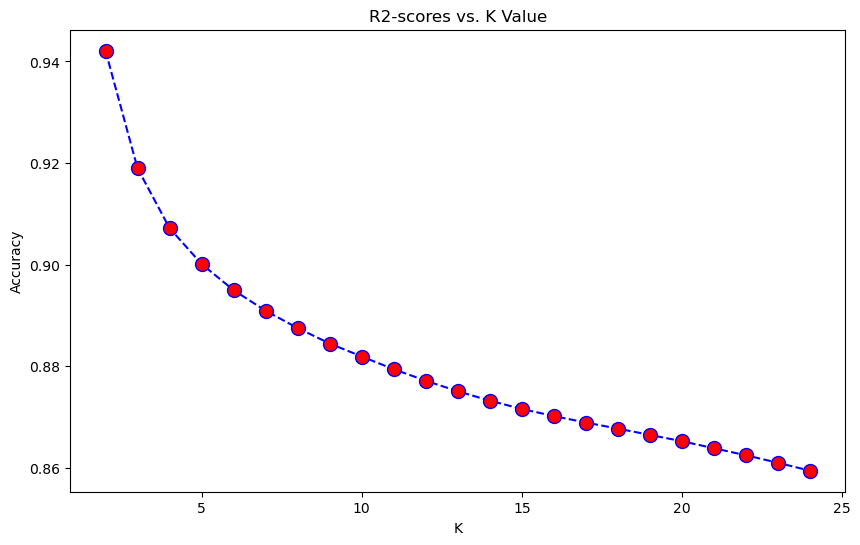

In [611]:
plt.figure(figsize=(10,6))
plt.plot(range(2,25),train,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2-scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [612]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train_processed, y_train)

KNeighborsRegressor()

In [613]:
model.score(X_train_processed, y_train)

0.9001254645956824

In [614]:
y_predicted = model.predict(X_test_processed)

In [615]:
rmse = np.sqrt(mean_squared_error(y_test,y_predicted))
print("root mean squared error (RMSE) is ", rmse)

root mean squared error (RMSE) is  1221.2991796722806


## Modeling the validation set

In [616]:
y_val_predicted = model.predict(X_val_processed)

In [617]:
data_validation_new = pd.read_csv('validation_for_students.csv')
data_validation_new.head()


,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday
0,7,764,4,2013-12-26,0,0,0,c,1
1,19,22,3,2013-05-22,449,1,0,0,1
2,31,1087,6,2013-06-29,622,1,0,0,0
3,45,139,6,2013-08-17,314,1,0,0,0
4,56,568,1,2014-04-07,356,1,0,0,0


In [618]:
y_val_predicted = pd.DataFrame(y_val_predicted)

In [620]:
results = pd.concat((data_validation_new['True_index'], y_val_predicted),axis=1)
results

In [197]:
#save intermediate results:
results.to_csv('results.csv', index=False)